In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
df = pd.read_csv('health care diabetes.csv')

## 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Visually explore these variables using histograms. Treat the missing values accordingly.

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

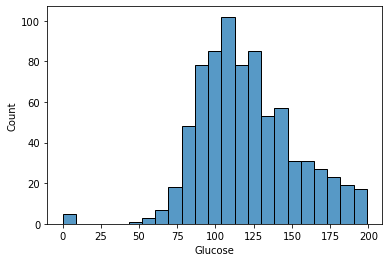

In [8]:
sns.histplot(data=df, x="Glucose")

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

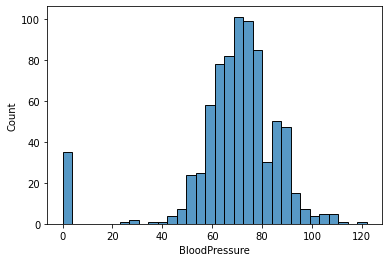

In [9]:
sns.histplot(data=df, x="BloodPressure")

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

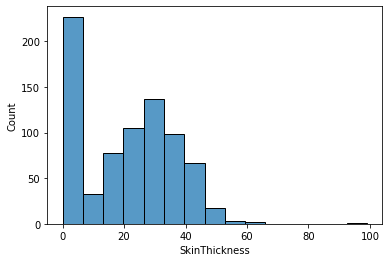

In [10]:
sns.histplot(data=df, x="SkinThickness")

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

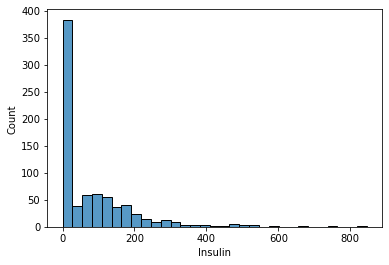

In [11]:
sns.histplot(data=df, x="Insulin")

<AxesSubplot:xlabel='BMI', ylabel='Count'>

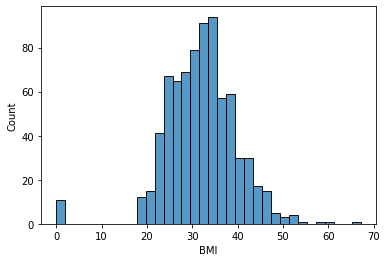

In [12]:
sns.histplot(data=df, x="BMI")

Lots of 0's in the data, in particular in skin thickness and insulin. Also, all distributions seem fairly normal, though Insulin is slightly right-skewed. I'd like to replace the 0's using some measure of central tendency of that respective column, but want to separate the dataframe into the two separate outcomes first and then explore what the distributions look like.

C:\Users\ngsch\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

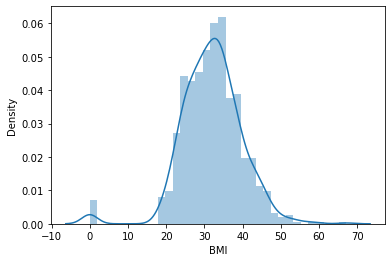

In [13]:
sns.distplot(df.BMI)

In [14]:
df_0 = df[df['Outcome']==0]
df_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [15]:
df_1 = df[df['Outcome']==1]
df_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


Want to see if any entries have 0's in the all the columns, in which case I would drop that entry entirely rather than try to deal with all the 0's.

In [16]:
df_bad = df[(df['Glucose']==0)&(df['BloodPressure']==0)&(df['SkinThickness']==0)&(df['Insulin']==0)&(df['BMI']==0)]
df_bad.size

0

No such entries that meet that criteria so no need to deal with them.

Checking the distribution of data for each of the two dataframes, starting with Outcome = 1

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

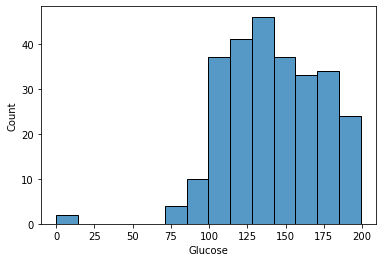

In [17]:
sns.histplot(data=df_1, x="Glucose")

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

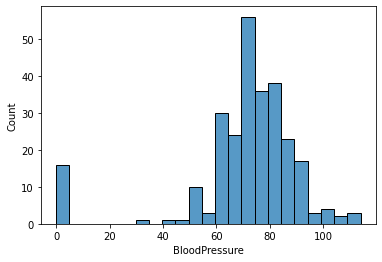

In [18]:
sns.histplot(data=df_1, x="BloodPressure")

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

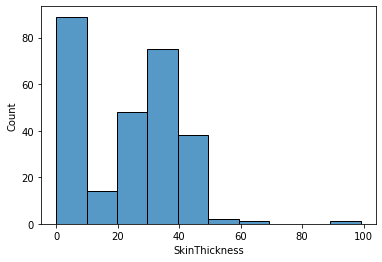

In [19]:
sns.histplot(data=df_1, x="SkinThickness")

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

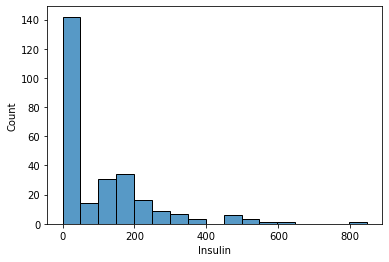

In [20]:
sns.histplot(data=df_1, x="Insulin")

<AxesSubplot:xlabel='BMI', ylabel='Count'>

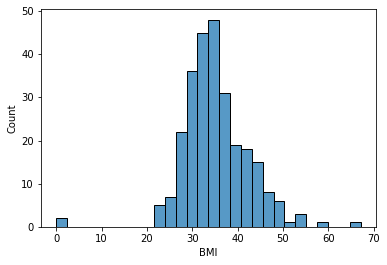

In [21]:
sns.histplot(data=df_1, x="BMI")

Now to check for all entries where the outcome was 0

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

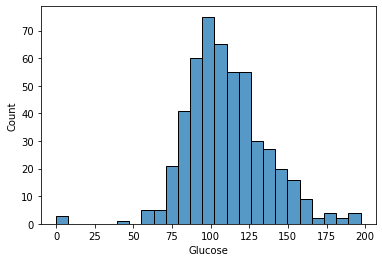

In [22]:
sns.histplot(data=df_0, x="Glucose")

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

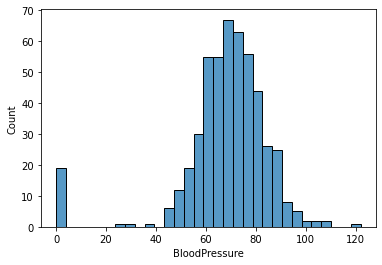

In [23]:
sns.histplot(data=df_0, x="BloodPressure")

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

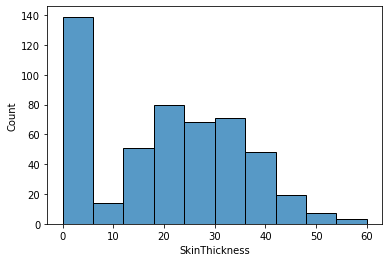

In [24]:
sns.histplot(data=df_0, x="SkinThickness")

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

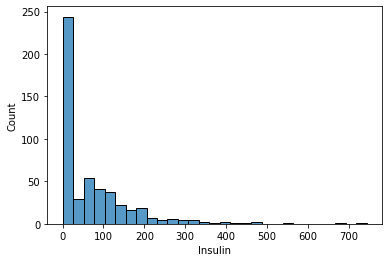

In [25]:
sns.histplot(data=df_0, x="Insulin")

<AxesSubplot:xlabel='BMI', ylabel='Count'>

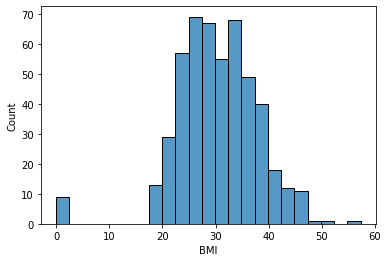

In [26]:
sns.histplot(data=df_0, x="BMI")

The distributions look similar, with relatively normal distributions outside of the 0's column in all measures and Insulin remaining slightly right-skewed. Now, let's see if there is a difference in the values between the two dataframes we have made on the Outcome column.

In [27]:
df_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [28]:
df_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


Taking a quick glance at the mean and median of the columns shows a significant difference so I'm glad we did this. Next step will be to fill in the missing values with some measure of central tendency. Given the relatively normal shape of the distributions, I am going to fill in the 0's with the median of the respective column in each dataframe to avoid any potential outliers having too much impact. First though, I need to calculate the median of each column, having removed the 0's first to get a more accurate measure of median, and then assign them each to a variable to make replacing easier later on.

Doing one first to check and make sure the code works.

In [29]:
preg1 = df_1[df_1['Pregnancies']>0]
preg1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.0
mean,5.669565,140.765217,72.082609,21.760870,102.113043,34.470000,0.535157,38.469565,1.0
std,3.426640,32.515990,19.328174,17.554388,140.463877,6.885921,0.335575,10.709602,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,3.000000,117.250000,68.000000,0.000000,0.000000,30.400000,0.261000,29.250000,1.0
50%,5.000000,140.500000,74.000000,27.000000,0.000000,33.800000,0.445000,38.000000,1.0
75%,8.000000,166.000000,82.000000,35.000000,170.250000,38.150000,0.720500,45.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,55.000000,2.137000,70.000000,1.0


In [30]:
preg1_median = preg1['Pregnancies'].median()
preg1_median

5.0

We got the result we wanted (median = 5), so we will use this code for all remaining variables.

In [31]:
# rest for outcome = 1:
glucose1_median = df_1[df_1['Glucose']>0]['Glucose'].median()
blood1_median = df_1[df_1['BloodPressure']>0]['BloodPressure'].median()
skin1_median = df_1[df_1['SkinThickness']>0]['SkinThickness'].median()
insluin1_median = df_1[df_1['Insulin']>0]['Insulin'].median()
bmi1_median = df_1[df_1['BMI']>0]['BMI'].median()

# all for outcome = 0:
preg0_median = df_0[df_0['Pregnancies']>0]['Pregnancies'].median()
glucose0_median = df_0[df_0['Glucose']>0]['Glucose'].median()
blood0_median = df_0[df_0['BloodPressure']>0]['BloodPressure'].median()
skin0_median = df_0[df_0['SkinThickness']>0]['SkinThickness'].median()
insluin0_median = df_0[df_0['Insulin']>0]['Insulin'].median()
bmi0_median = df_0[df_0['BMI']>0]['BMI'].median()

In [32]:
# test all the variables
print(glucose1_median)
print(blood1_median)
print(skin1_median)
print(insluin1_median)
print(bmi1_median)
print(preg0_median)
print(glucose0_median)
print(blood0_median)
print(skin0_median)
print(insluin0_median)
print(bmi0_median)

140.0
74.5
32.0
169.5
34.3
3.0
107.0
70.0
27.0
102.5
30.1


Now to replace using these variables for both dataframes

In [33]:
df_1.replace({'Pregnancies': 0}, preg1_median, inplace=True)
df_1.replace({'Glucose': 0}, glucose1_median, inplace=True)
df_1.replace({'BloodPressure': 0}, blood1_median, inplace=True)
df_1.replace({'SkinThickness': 0}, skin1_median, inplace=True)
df_1.replace({'Insulin': 0}, insluin1_median, inplace=True)
df_1.replace({'BMI': 0}, bmi1_median, inplace=True)
df_0.replace({'Pregnancies': 0}, preg0_median, inplace=True)
df_0.replace({'Glucose': 0}, glucose0_median, inplace=True)
df_0.replace({'BloodPressure': 0}, blood0_median, inplace=True)
df_0.replace({'SkinThickness': 0}, skin0_median, inplace=True)
df_0.replace({'Insulin': 0}, insluin0_median, inplace=True)
df_0.replace({'BMI': 0}, bmi0_median, inplace=True)

C:\Users\ngsch\miniconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\ngsch\miniconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\ngsch\miniconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Now to check and confirm that there are no 0's in any of the columns (min > 0)

In [34]:
df_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,5.574627,142.302239,75.272388,32.671642,187.615672,35.398507,0.550500,37.067164,1.0
std,3.182058,29.488811,11.927232,8.469178,94.114420,6.590852,0.372354,10.968254,0.0
min,1.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,3.000000,119.000000,68.000000,30.000000,169.500000,30.900000,0.262500,28.000000,1.0
50%,5.000000,140.000000,74.500000,32.000000,169.500000,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,169.500000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [35]:
df_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.736000,110.62200,70.844000,27.170000,117.172000,30.846000,0.429734,31.190000,0.0
std,2.707946,24.70392,11.928631,8.516935,75.685302,6.502089,0.299085,11.667655,0.0
min,1.000000,44.00000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,2.000000,93.00000,63.500000,22.000000,95.000000,25.750000,0.229750,23.000000,0.0
50%,3.000000,107.00000,70.000000,27.000000,102.500000,30.100000,0.336000,27.000000,0.0
75%,5.000000,125.00000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.00000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


Now to join the two dataframes back together

In [36]:
frames = [df_0, df_1]
df = pd.concat(frames)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.377604,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.010736,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see the minimums now are > 0, meaning we have successfully treated the missing values.

## 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

<AxesSubplot:>

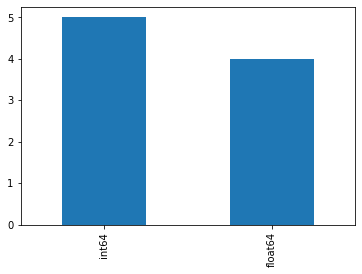

In [37]:
df.dtypes.value_counts().plot(kind='bar')

 - 5 Int64 variables and 4 Float64 variables

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

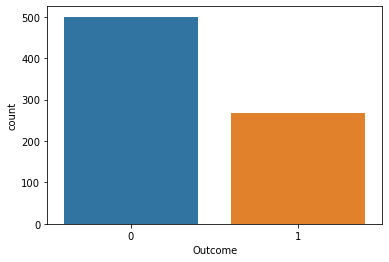

In [38]:
sns.countplot(x=df['Outcome'])

We have a dataset where we have almost double the number of negative results (0) as we do positive results (1). We will have to consider this distribution when we take samples to test and train our model.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

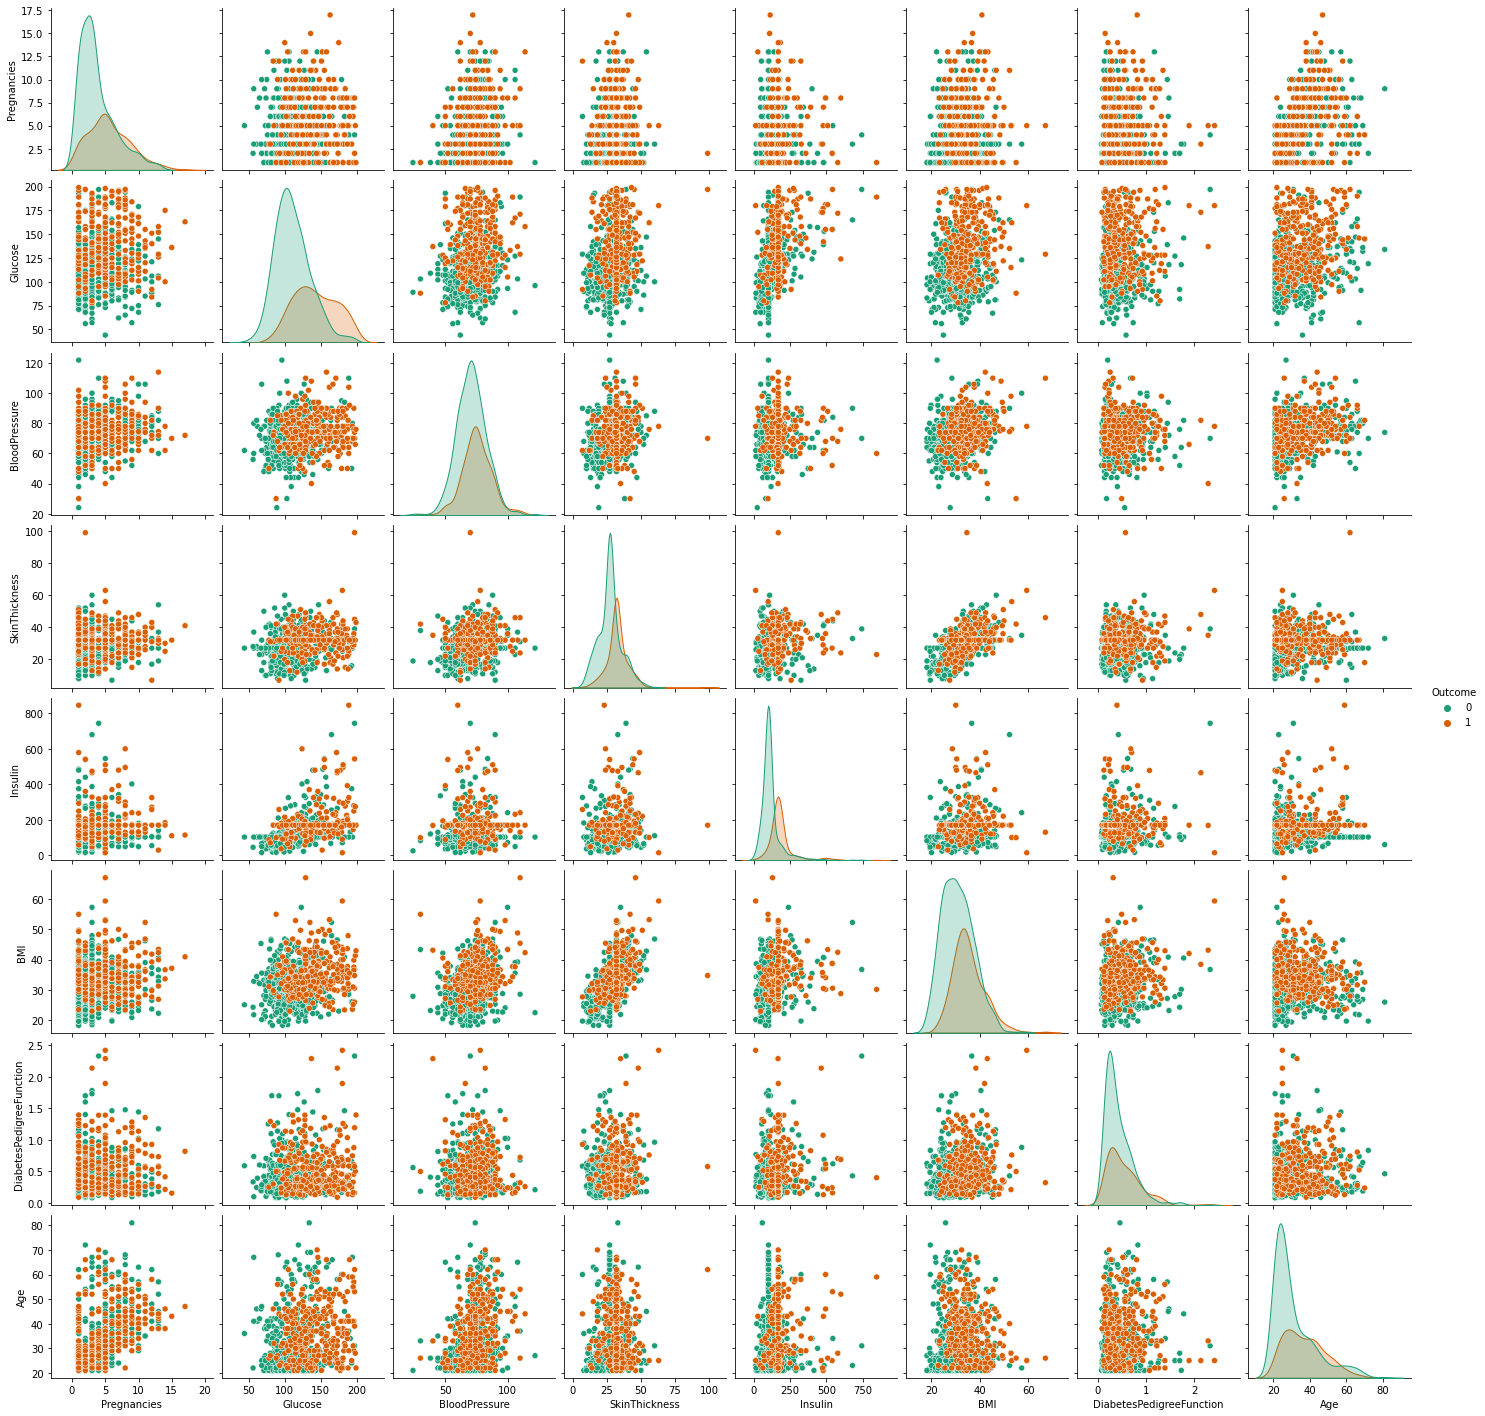

In [39]:
sns.pairplot(data=df, hue='Outcome', palette= 'Dark2')

 - Skin Thickness and BMI seem to have the strongest positive correlation, with Glucose and Insulin seeming to be the only other correlation visualized. No other correlation seems to be noticeable in the dataset.

3. Perform correlation analysis. Visually explore it using a heat map.

In [40]:
cor = df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.176302,0.256749,0.141004,0.079835,0.115098,0.000826,0.527049,0.291270
Glucose,0.176302,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.256749,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.141004,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.079835,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.115098,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,0.000826,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.527049,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.291270,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


<AxesSubplot:>

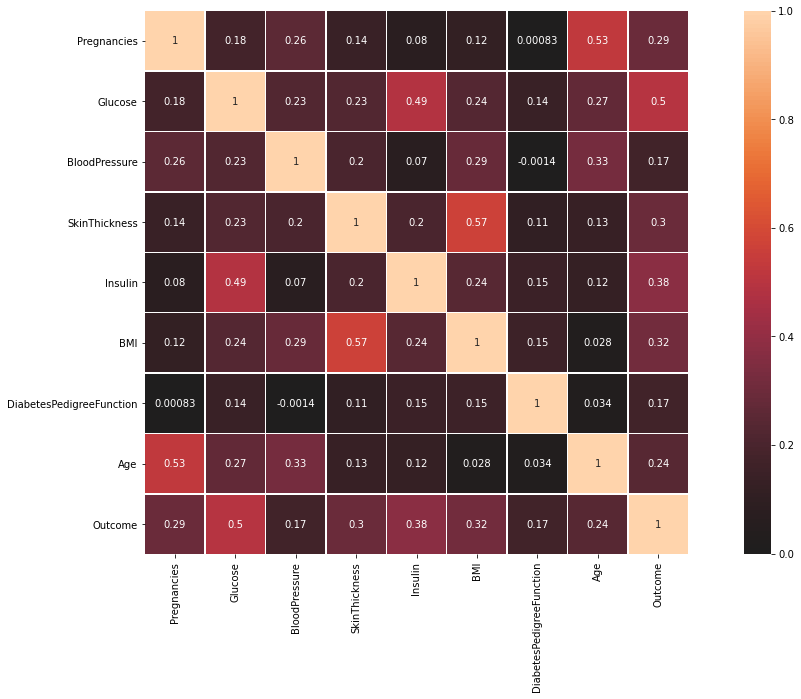

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cor, center = 0, square=True, annot=True, linewidth=.5)

The correlations we noted above in the pairplots are borne out here, but not major corrlations.
Outcome is most closely correlated with Glucose, but not an overly strong correlation either.

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Given that we are doing a simple binary classification, there are a handful of model types we could use. I will build models for  Logistics Regression, K-Nearest Neighbours, and Random Forest and then run K-Fold Cross Validation on them to validate.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix, classification_report

In [43]:
var_df = df.drop(['Outcome'], axis='columns')
scaler = StandardScaler()
var_scaled_df = scaler.fit_transform(var_df)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(var_scaled_df, df.Outcome, random_state=13, test_size=.2)

In [45]:
lr_model = LogisticRegression(class_weight='balanced', random_state=13, max_iter=300)

In [46]:
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=13)

In [47]:
lr_pred = lr_model.predict(X_test)

In [48]:
lr_accuracy = accuracy_score(y_test, lr_pred)

In [49]:
lr_roc_auc = roc_auc_score(y_test, lr_pred)

In [50]:
lr_f1 = f1_score(y_test, lr_pred)

In [51]:
lr_mse = mean_squared_error(y_test, lr_pred)

In [52]:
lr_con = confusion_matrix(y_test, lr_pred)

In [53]:
kn_model = KNeighborsClassifier(weights='distance')
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)

kn_accuracy = accuracy_score(y_test, kn_pred)
kn_roc_auc = roc_auc_score(y_test, kn_pred)
kn_f1 = f1_score(y_test, kn_pred)
kn_mse = mean_squared_error(y_test, kn_pred)

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

In [55]:
print('For the Logistic Regression model: \naccuracy = ' + str(lr_accuracy) + ' \nAUC = ' +str(lr_roc_auc) + '\nF1 score = ' 
      + str(lr_f1) + '\nMean Squared Error = ' + str(lr_mse)
)

For the Logistic Regression model: 
accuracy = 0.7532467532467533 
AUC = 0.7426297703020437
F1 score = 0.6779661016949152
Mean Squared Error = 0.24675324675324675


In [56]:
print('For the K Nearest Neighbor model: \naccuracy = ' + str(kn_accuracy) + ' \nAUC = ' +str(kn_roc_auc) + '\nF1 score = ' 
      + str(kn_f1) + '\nMean Squared Error = ' + str(kn_mse)
)

For the K Nearest Neighbor model: 
accuracy = 0.8246753246753247 
AUC = 0.8065653825284862
F1 score = 0.7567567567567567
Mean Squared Error = 0.17532467532467533


In [57]:
print('For the Random Forest model: \naccuracy = ' + str(rf_accuracy) + ' \nAUC = ' +str(rf_roc_auc) + '\nF1 score = ' 
      + str(rf_f1) + '\nMean Squared Error = ' + str(rf_mse)
)

For the Random Forest model: 
accuracy = 0.8506493506493507 
AUC = 0.8235666485802134
F1 score = 0.7809523809523811
Mean Squared Error = 0.14935064935064934


Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [58]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [59]:
print('Classification Report for Logistic Regression Model\n')
print(classification_report(y_test, lr_pred))
print()
print()
lr_scores = cross_val_score(lr_model, var_df, df.Outcome, scoring='accuracy', n_jobs=-1)
print(lr_scores)

Classification Report for Logistic Regression Model

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        97
           1       0.66      0.70      0.68        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.75      0.75       154



[0.77922078 0.76623377 0.7987013  0.81699346 0.83006536]


In [60]:
print('Classification Report for K-Nearest Neighbor Model\n')
print(classification_report(y_test, kn_pred))
print()
print()
kn_scores = cross_val_score(kn_model, var_df, df.Outcome, scoring='accuracy', n_jobs=-1)
print(kn_scores)

Classification Report for K-Nearest Neighbor Model

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        97
           1       0.78      0.74      0.76        57

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154



[0.86363636 0.85714286 0.86363636 0.88235294 0.82352941]


In [61]:
print('Classification Report for Random Forest Model\n')
print(classification_report(y_test, rf_pred))
print()
print()
rf_scores = cross_val_score(rf_model, var_df, df.Outcome, scoring='accuracy', n_jobs=-1)
print(rf_scores)

Classification Report for Random Forest Model

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.85      0.72      0.78        57

    accuracy                           0.85       154
   macro avg       0.85      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



[0.8961039  0.85064935 0.87012987 0.92156863 0.90196078]


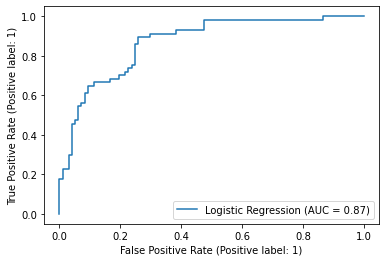

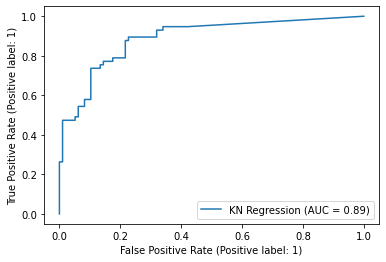

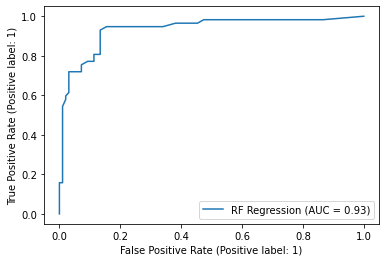

In [62]:
plot_roc_curve(lr_model, X_test, y_test, name = 'Logistic Regression')
plot_roc_curve(kn_model, X_test, y_test, name = 'KN Regression')
plot_roc_curve(rf_model, X_test, y_test, name = 'RF Regression')

In [63]:
accuracy_scores = [lr_accuracy, kn_accuracy, rf_accuracy]
auc_scores = [lr_roc_auc, kn_roc_auc, rf_roc_auc]
f1_scores = [lr_f1, kn_f1, rf_f1]
mse_scores = [lr_mse, kn_mse, rf_mse]

In [64]:
models = ('Logistic Regression',  'KNN', 'Random Forest')

In [65]:
stats_df = pd.DataFrame(data=[accuracy_scores, auc_scores, f1_scores, mse_scores],
                        index=['Accuracy',  'AUC Scores', 'F1 Score', 'Mean-Squared Error'],
                       columns = models)

[Text(0.5, 1.0, 'Comparitive scores of all 3 Models')]

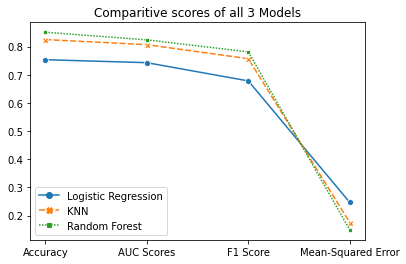

In [66]:
sns.lineplot(data=stats_df, markers = True).set(title='Comparitive scores of all 3 Models')

In [67]:
df.to_excel('diabetes_final.xlsx')

Looking at all the metrics and scores, it seems the best performing model is the Random Forest Classifier, having scored the highest across all measures we looked at (accuracy, auc score, mean squared error, etc.).

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 